# Pymaceuticals Inc.
---

### Analysis

- Of the ten drug regimines, the Capomulin and Ramicane trials stood out in the summary statistics table for markedly lower mean tumor volumes and variance in tumor volume in the respective trials.

- These two drugs also stood out for lower standard error means, indicating greater confidence in the trial results if performed in a larger population; the bar charts show that Capomulin and Ramicane both had larger numbers of timepoints than any other drug, which may be a contributing factor to the SEMs.

- Sex was roughly balanced in the trials as seen in the pie charts: 51% Male vs. 49% Female mice.

- Though each of the four focus trials resulted in similarly sized interquartile ranges ("IQR"), final tumor volumes were generally lower for Capomulin and Ramicane. Only the Infubinol trial had any outliers, with a single instance below its lower bound.

- There is a strong positive correlation between mouse weight and the average tumor volume of 0.84, and depicted by the regression line against the scatterplot. This suggests that largest tumor volumes correspond generally with greater mouse weights.

- Overall, Pymaceutical's interest in Capomulin appears to be justified by the positive results and their statisical meaingfulness. Ramicane may also warrant further research based on similarly strong meanginful results.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged_data['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = merged_data.loc[merged_data['Mouse ID'] == 'g989']
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_data_complete = merged_data[merged_data["Mouse ID"].isin(duplicate_mice) == False]
cleaned_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).sum()
len(cleaned_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drugs_mean = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
drugs_median = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median() 
drugs_var = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var() 
drugs_std = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std() 
drugs_sem = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem() 

compiled_drug_stats = pd.DataFrame({
                                    "Mean Tumor Volume": drugs_mean,
                                    "Median Tumor Volume": drugs_median,
                                    "Tumor Volume Variance": drugs_var,
                                    "Tumor Volume Std. Dev.": drugs_std,
                                    "Tumor Volume Std. Err.": drugs_sem
                                    })

compiled_drug_stats    

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats = cleaned_study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(["mean","median", "var", "std", "sem"])

# renaming of columns to match expected column labels
agg_drug_stats = stats.rename(columns={
                                "mean": "Mean Tumor Volume",
                                "median": "Median Tumor Volume",
                                "var": "Tumor Volume Variance",
                                "std": "Tumor Volume Std. Dev.",
                                "sem": "Tumor Volume Std. Err."
                                })

agg_drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

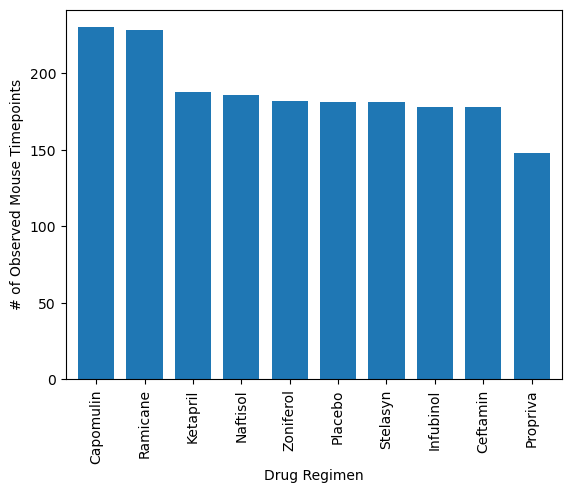

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_pdplot = cleaned_study_data_complete['Drug Regimen'].value_counts().plot.bar(width=0.75, 
                                                                                    ylabel='# of Observed Mouse Timepoints')

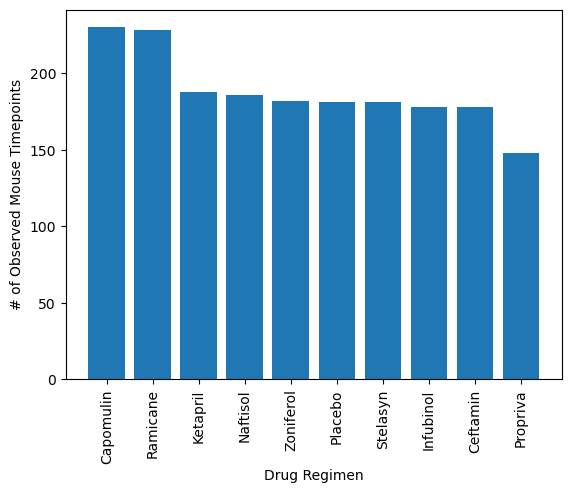

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts = cleaned_study_data_complete['Drug Regimen'].value_counts()
x_axis = drug_counts.index
y_axis = drug_counts

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

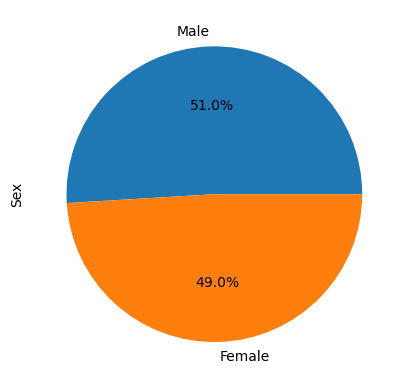

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#need to get count by gender
sex_counts = cleaned_study_data_complete['Sex'].value_counts()

#plot pie
panda_pie = sex_counts.plot(kind='pie', label='Sex', autopct="%1.1f%%")

In [12]:
cleaned_study_data_complete['Sex'].value_counts()

Sex
Male      958
Female    922
Name: count, dtype: int64

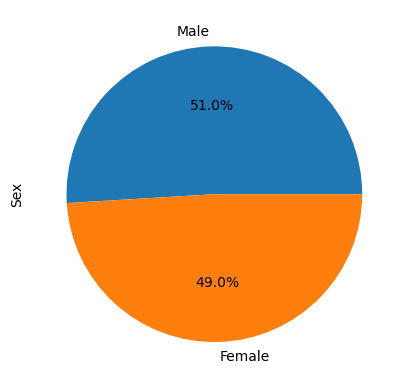

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create label array to reference and plot
sex_labels = cleaned_study_data_complete['Sex'].unique()
plt.pie(sex_counts, labels=sex_labels, autopct="%1.1f%%")

# Add 'Sex' label along Y-axis
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_study_data_complete.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_tp = pd.merge(cleaned_study_data_complete, last_timepoint, on='Mouse ID', how='outer')
merged_last_tp = merged_last_tp.rename(columns={
                                                    'Timepoint_x': 'Timepoint',
                                                    'Timepoint_y': 'Last Timepoint'
                                                    })

last_tp_clean = merged_last_tp.loc[merged_last_tp['Timepoint'] == merged_last_tp['Last Timepoint']]
last_tp_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# for loop to iterate through df by items in treatment list
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # df to capture matching records by treatment/drug
    tumor_vol = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # add subset 
    # add matching records to the tumor volume list with every loop iteration
# tumor_last = drug_df['Tumor Volume (mm3)']
    # tumor_vol_data.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # calculated the quartiles, whiskers, etc. via loop in addition to the .describe() approach required further above
    quartiles = tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

# Determine outliers using upper and lower bounds
    upperw = (upperq + 1.5*iqr)
    lowerw = (lowerq - 1.5*iqr)
    all_outliers = tumor_vol.loc[(tumor_vol >= upperw) | (tumor_vol <= lowerw)]

    if len(all_outliers) > 0:
        print(f"Potential outliers for {drug} are: {all_outliers}")


Potential outliers for Infubinol are: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [21]:
# Consolidated data to reference for box plots by drug trial:

# Isolated drug regimens of interest at mice final timepoints into separate data frames
Capomulin = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == 'Capomulin']
Ramicane = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == 'Ramicane']
Infubinol = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == 'Infubinol']
Ceftamin = last_tp_clean.loc[last_tp_clean['Drug Regimen'] == 'Ceftamin']

#Capomulin
Capomulin.describe()
capomulin_lowerq = 32.377357
capomulin_median = 38.125164
capomulin_upperq = 40.159220
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_upperb = (capomulin_upperq + 1.5*capomulin_iqr)
capomulin_lowerb = (capomulin_lowerq - 1.5*capomulin_iqr)

#Ramicane
Ramicane.describe()
ramicane_lowerq = 31.560470
ramicane_median = 36.561652
ramicane_upperq = 40.659006
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_upperb = (ramicane_upperq + 1.5*ramicane_iqr)
ramicane_lowerb = (ramicane_lowerq - 1.5*ramicane_iqr)

#Infubinol
Infubinol.describe()
infubinol_lowerq = 54.048608
infubinol_median = 60.165180
infubinol_upperq = 65.525743
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_upperb = (infubinol_upperq + 1.5*infubinol_iqr)
infubinol_lowerb = (infubinol_lowerq - 1.5*infubinol_iqr)

#Ceftamin
Ceftamin.describe()
ceftamin_lowerq = 48.722078
ceftamin_median = 59.851956
ceftamin_upperq = 64.299830
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_upperb = (ceftamin_upperq + 1.5*ceftamin_iqr)
ceftamin_lowerb = (ceftamin_lowerq - 1.5*ceftamin_iqr)

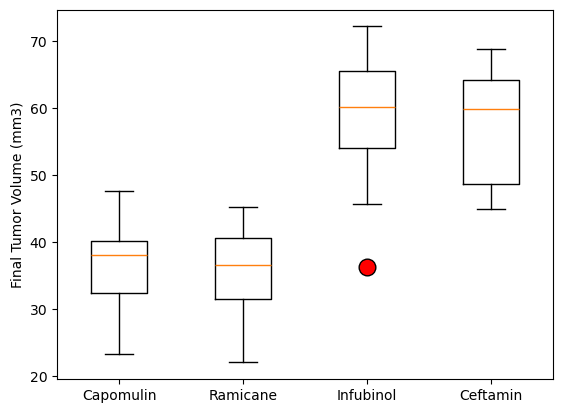

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# organize drug data for boxplots
box_tumor_data = (Capomulin['Tumor Volume (mm3)'],
                  Ramicane['Tumor Volume (mm3)'],
                  Infubinol['Tumor Volume (mm3)'],
                  Ceftamin['Tumor Volume (mm3)'])

# labels for each boxplot
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# referenced stackoverlow to understand parameter forstyling outliers
# source: https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')

# plot the chart including labels, etc.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(box_tumor_data, labels=labels, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

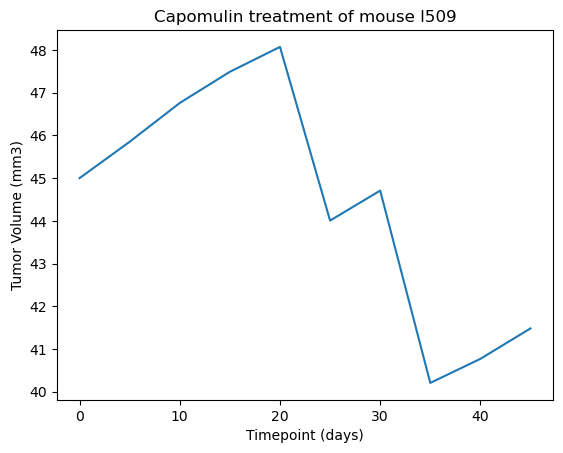

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Get data for target mouse to chart
mouse_l509 = cleaned_study_data_complete.loc[cleaned_study_data_complete['Mouse ID'] == 'l509']

# plot chart for target mouse
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])        
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

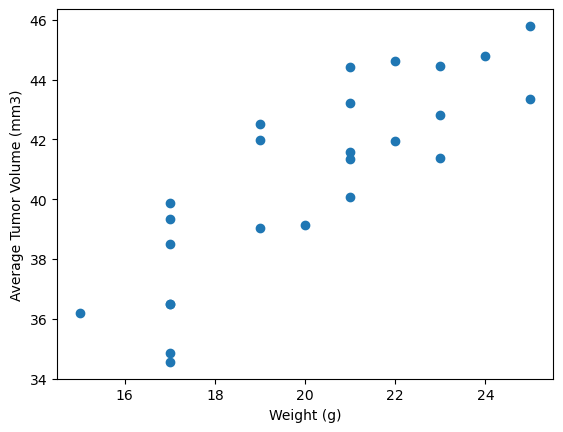

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# isolate Capomulin mouse observations
all_capomulin = cleaned_study_data_complete.loc[cleaned_study_data_complete['Drug Regimen'] == 'Capomulin']

# calculate mean tumor volume for each Capomulin mouse
cap_tumor_mean = all_capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
cap_tumor_mean

# merge mean df with other Capomulin data so chart can plot average tumor volume by weight
all_cap_tumor_weight = pd.merge(all_capomulin, cap_tumor_mean, on='Mouse ID')

#rename columns after merge
all_cap_tumor_weight = all_cap_tumor_weight.rename(columns={
                                                    'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                                                    'Tumor Volume (mm3)_y': 'mean_tumor_vol'
                                                    })

#isolate data to plot weight and avg tumor vol by removing duplicates
cap_avgweight_tumor = all_cap_tumor_weight[['Weight (g)', 'mean_tumor_vol']].drop_duplicates()

#set variables for x and y values
x_values = cap_avgweight_tumor['Weight (g)']
y_values = cap_avgweight_tumor['mean_tumor_vol']

# plot scatterplot and add labels, etc.
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


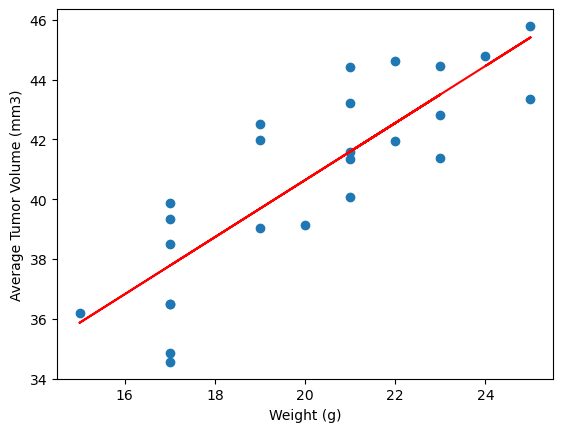

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#set variables for x and y values
x_values = cap_avgweight_tumor['Weight (g)']
y_values = cap_avgweight_tumor['mean_tumor_vol']

#generate the regression line and plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#print the correlation finding before plt.show() so it appears above chart
print(f'The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}') 
plt.show()